# Rank BM 25 Search Engine

## Configuration

In [1]:
%load_ext autotime

In [2]:
from rank_bm25 import *

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import os

In [3]:
path = os.getcwd()+'\\full_data\\'
print('Path: ', path)

Path:  C:\Users\ramos\OneDrive\Documents\SyracuseUniversity\9th_Quarter\IST736\Project\full_data\


## Analysis

### About the Data

In [4]:
df = pd.read_csv(path + 'mcu_data.csv', index_col=0).reset_index(drop=True)[['character', 'line', 'movie', 'year', 'words']]
print('Entries: ', len(df))
df.head()

Entries:  6509


,character,line,movie,year,words
0,TONY STARK,"Oh, I get it. You guys aren’t allowed to talk...",Iron Man,2008,22
1,TONY STARK,Oh. I see. So it’s personal.,Iron Man,2008,8
2,TONY STARK,"Good God, you’re a woman. I, honestly, I could...",Iron Man,2008,31
3,TONY STARK,Please.,Iron Man,2008,1
4,TONY STARK,Excellent question. Yes and no. March and I ha...,Iron Man,2008,28


In [6]:
df.groupby(['movie', 'year']).head(1)[['movie', 'year']]

,movie,year
0,Iron Man,2008
433,Iron Man 2,2010
1104,Thor,2011
1364,Captain America: The First Avenger,2011
1556,The Avengers,2012
2265,Iron Man 3,2013
2797,Thor: The Dark World,2013
3032,Captain America: The Winter Soldier,2014
3437,Avengers: Age of Ultron,2015
4006,Ant-Man,2015


In [5]:
df.sample(20)[['character', 'line', 'movie', 'year']].head(20)

,character,line,movie,year
4526,PETER PARKER,Mm-hmm.,Spider-Man: Homecoming,2017
4283,TONY STARK,"Alright, Spider-Man. Get me out of this.",Captain America: Civil War,2016
3915,TONY STARK,The spire's Vibranium. If I get Thor to hit it...,Avengers: Age of Ultron,2015
4637,PETER PARKER,"This is a mistake. Hey, let’s just go home.",Spider-Man: Homecoming,2017
6157,BRUCE BANNER,We didn’t say we were here to see-,Avengers: Endgame,2019
5877,NICK FURY,"Well, she's dead.",Captain Marvel,2019
3542,THOR,That's the whole story?,Avengers: Age of Ultron,2015
2385,PEPPER POTTS,It would be incredible.,Iron Man 3,2013
3606,THOR,"Yes, well that's, uh, that's a very, very inte...",Avengers: Age of Ultron,2015
1569,NICK FURY,That can be harmful. Where’s agent Barton?,The Avengers,2012


### Processing Data

In [6]:
### Define RegexpTokenizer Tokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')

### Define Unwanted Words / Punctuation
import re
from nltk.corpus import stopwords
stopWords = stopwords.words('english')

### Define Lemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
lmt = WordNetLemmatizer()

### Define Stemmer
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

def preprocess_text(doc):
    """
    Function used to preprocess review into a standarized format.
    The function tokenizes, standarizes, removes punctuation, removes stopwords, lemmatizes and stemms.
    """
    
    tokens = tokenizer.tokenize(doc)
    
    clean_tokL = []
    for tkn in tokens:
        
        ### Standarize Text
        # lower case
        tkn_processed = tkn.lower()
        # remove digits
        tkn_processed = re.sub(r'\d+', '', tkn_processed)
        # remove punctuation and special chars
        tkn_processed = re.sub(r'[^\w\s]+', ' ', tkn_processed)
        # strip whitespace
        tkn_processed = tkn_processed.strip()
        
        ### Remove Stop Words
        if tkn_processed in stopWords:
            continue
            
        ### Lemmatize
        # tkn_processed = lmt.lemmatize(tkn_processed)
        
        ### Stem Token
        # tkn_processed = stemmer.stem(tkn_processed)
            
        # If word is not empy, then add to document token list
        if tkn_processed != '':
            clean_tokL.append(tkn_processed)
            
    return clean_tokL

### Pre Process Reviews with Function
df['line_processed'] = [preprocess_text(doc) for doc in df['line'].values]

## Modeling

### Simple Search by Matching String Value

In [7]:
tokenized_corpus = df['line_processed'].values
bm25 = BM25Okapi(tokenized_corpus)

,character,line,movie
5463,BRUCE BANNER,Thanos is coming. He's coming...,Avengers: Infinity War
5608,THOR,The Thanos killing kind.,Avengers: Infinity War
5718,PETER PARKER,"So, you're not with Thanos?",Avengers: Infinity War
5774,THOR,BRING ME THANOS!,Avengers: Infinity War
6172,BRUCE BANNER,Like Thanos.,Avengers: Endgame


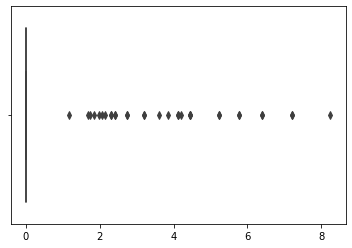

In [8]:
query = 'thanos' ## Enter search query
tokenized_query = query.split(' ')
doc_scores = bm25.get_scores(tokenized_query)
sns.boxplot(x=doc_scores)

docs = bm25.get_top_n(tokenized_query, df['line'].values, n=5)
df_search = df[df['line'].isin(docs)]
df_search[['character', 'line', 'movie']].head()

In [17]:
query = 'character' ## Enter search query
tokenized_query = query.split(' ')
doc_scores = bm25.get_scores(tokenized_query)

docs = bm25.get_top_n(tokenized_query, df['line'].values, n=5)
df_search = df[df['line'].isin(docs)]
df_search[['character', 'line', 'movie']].head()

,character,line,movie
435,TONY STARK,I know that it’s confusing. It is one thing to...,Iron Man 2
2163,TONY STARK,"Well, performance issues. You know? JARVIS, an...",The Avengers
2164,LOKI,You will all fall before me.,The Avengers
2172,NATASHA ROMANOFF,I see ’em.,The Avengers
6508,STEVE ROGERS,Nope. I don’t think I will.,Avengers: Endgame
